In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from growth.sweep.sweep import Sweep
from clones.validation.sweep import SweepBenchmark
%matplotlib inline

In [2]:
ls ../synthetic/landing/

ls: ../synthetic/landing/: No such file or directory


# load sweep results

In [3]:
sweep_path = '../synthetic/Sweep_181201_191516'
sweep = Sweep.load(sweep_path)
sweep

1 x 16 sweep, 4 recombination generations

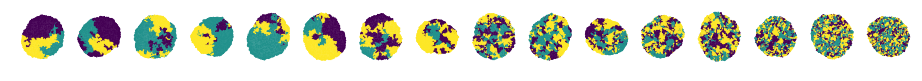

In [4]:
# plot single replicate for each batch
fig = sweep.plot_culture_grid(replicate_id=0, s=2)

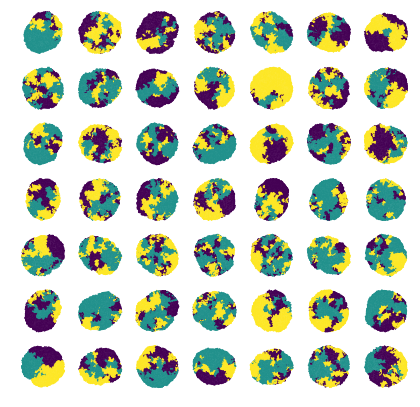

In [5]:
# plot all replicates for a single batch
fig = sweep.batches[0, 4].plot_culture_grid()

# load benchmarking results

In [6]:
benchmark = SweepBenchmark.load(sweep_path)

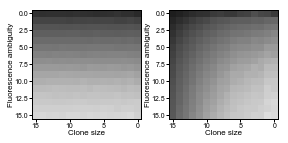

In [7]:
fig = benchmark.results.plot_absolute_error()

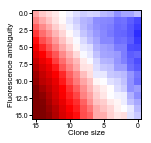

In [29]:
fig = benchmark.results.plot_relative_error()

In [24]:
from matplotlib.colors import Normalize

vmax = np.percentile(benchmark.load_benchmark(0, benchmark.num_scales-1).classifier.values, 99)
norm = Normalize(vmin=0, vmax=vmax)

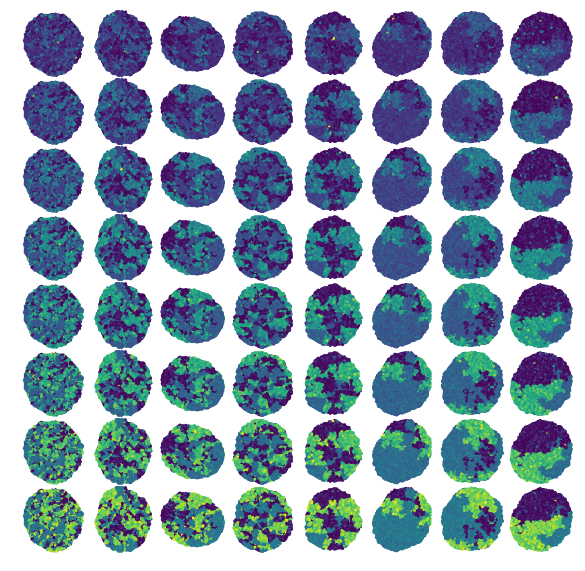

In [27]:
fig = benchmark.plot_fluorescence(resolution=2, s=8, figsize=(10, 10), cmap=plt.cm.viridis, norm=norm)

In [98]:
batch_id, scale_id = 0, 0
batch_benchmark = benchmark.load_benchmark(batch_id, scale_id)

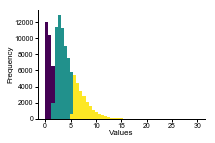

In [99]:
batch_benchmark.classifier.show(xlim=(0, 30))

In [31]:
simulation_benchmark = batch_benchmark.benchmark_simulation(0)

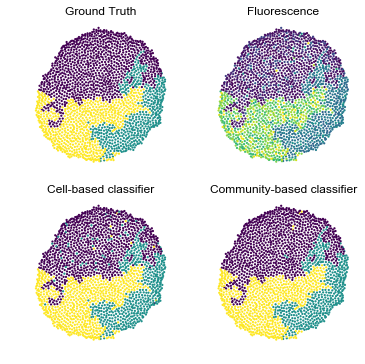

In [32]:
simulation_benchmark.show()

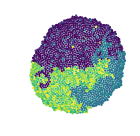

In [33]:
simulation_benchmark.plot_measurements(s=5)

In [ ]:
from growth.visualization.colorbars import ColorBar, ErrorColorBar
cbar = ColorBar(label='Change in Mean Absolute Error')
ebar = ErrorColorbar(vlim=(-8, 8), label='Fold-change in Mean Absolute Error')